Analyzing the Goalscorers

In [3]:
# Loading the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
goalscorers_df = pd.read_csv('goalscorers.csv')

# Display the first few rows of the dataframe for a quick overview
goalscorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [7]:
# Convert 'date' column to datetime format
goalscorers_df['date'] = pd.to_datetime(goalscorers_df['date'], errors='coerce')

In [9]:
goalscorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [11]:
goalscorers_df.columns.tolist()

['date',
 'home_team',
 'away_team',
 'team',
 'scorer',
 'minute',
 'own_goal',
 'penalty']

In [13]:
goalscorers_df.info

<bound method DataFrame.info of             date  home_team away_team       team            scorer  minute  \
0     1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1     1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2     1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3     1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4     1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   
...          ...        ...       ...        ...               ...     ...   
44357 2024-07-13     Canada   Uruguay    Uruguay       Luis Suárez    90.0   
44358 2024-07-14  Argentina  Colombia  Argentina  Lautaro Martínez   112.0   
44359 2024-07-14      Spain   England      Spain     Nico Williams    47.0   
44360 2024-07-14      Spain   England    England       Cole Palmer    73.0   
44361 2024-07-14      Spain   England      Spain   Mikel Oyarzabal    86.0   

       own_goal  penalty  
0   

In [15]:
goalscorers_df.describe

<bound method NDFrame.describe of             date  home_team away_team       team            scorer  minute  \
0     1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1     1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2     1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3     1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4     1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   
...          ...        ...       ...        ...               ...     ...   
44357 2024-07-13     Canada   Uruguay    Uruguay       Luis Suárez    90.0   
44358 2024-07-14  Argentina  Colombia  Argentina  Lautaro Martínez   112.0   
44359 2024-07-14      Spain   England      Spain     Nico Williams    47.0   
44360 2024-07-14      Spain   England    England       Cole Palmer    73.0   
44361 2024-07-14      Spain   England      Spain   Mikel Oyarzabal    86.0   

       own_goal  penalty  
0 

In [17]:
# Convert 'own_goal' and 'penalty' to boolean types
goalscorers_df['own_goal'] = goalscorers_df['own_goal'].astype(bool)
goalscorers_df['penalty'] = goalscorers_df['penalty'].astype(bool)

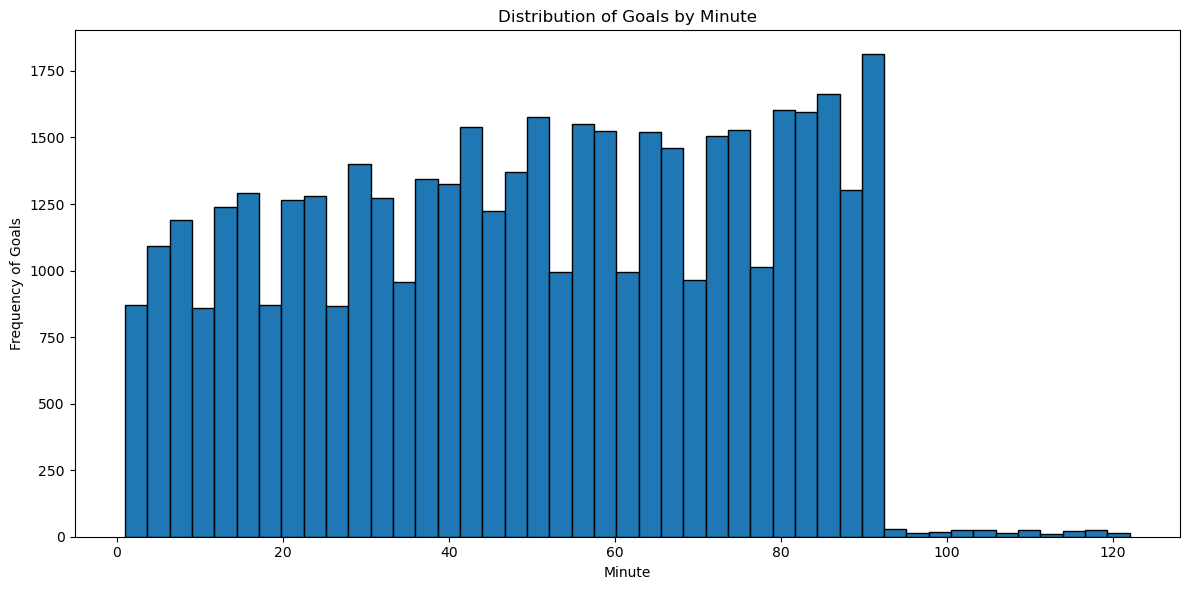

In [19]:
# 1. Goals by Minute visualization
plt.figure(figsize=(12, 6))
goalscorers_df['minute'].plot(kind='hist', bins=45, edgecolor='black')
plt.title('Distribution of Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency of Goals')
plt.tight_layout()
plt.savefig('/mnt/data/goals_by_minute_no_drop.png')
plt.show()

Details for the above Histogram:
1. Shows the timing of goals during matches. Mainly, towards the end of the match.
2. Peaks in the distribution reveal periods of high scoring intensity i.e. after 80th minute
3. This insight is valuable for identifying strategic moments within a game. This helps us understand that most of the teams score goals during the last 10 minutes of the match.

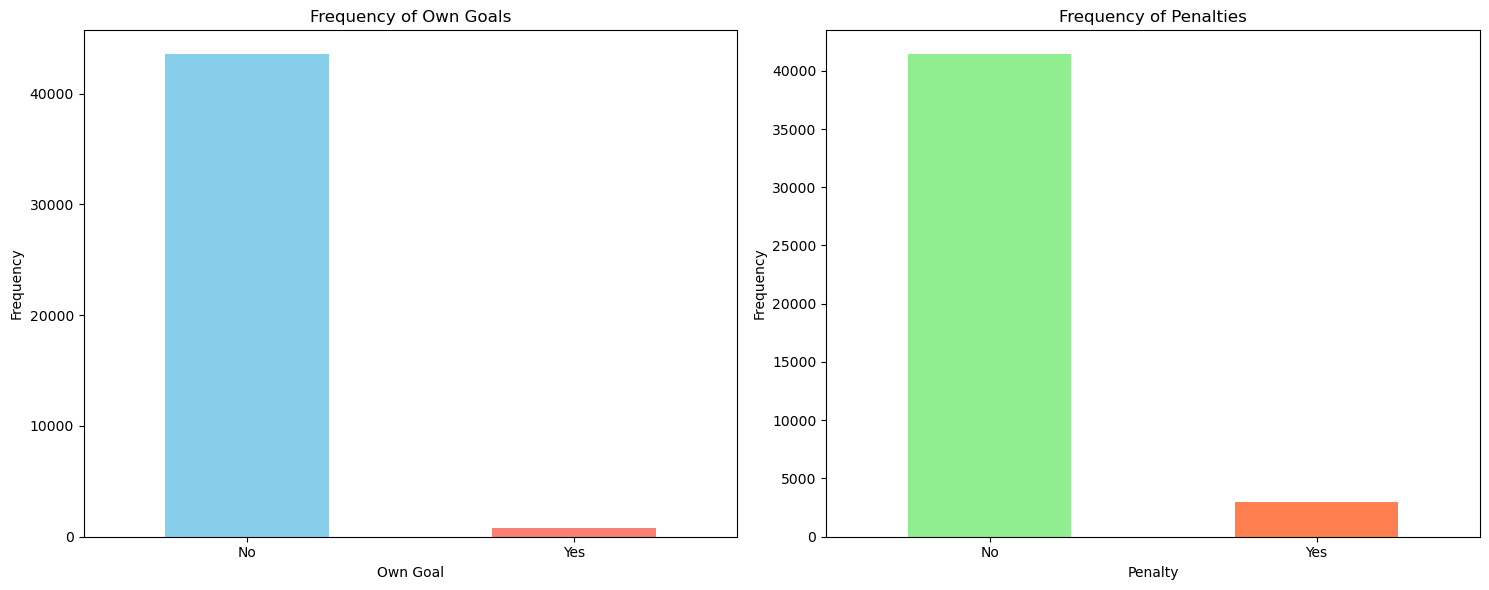

In [21]:
# 2. Own Goals and Penalties
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Own Goals
goalscorers_df['own_goal'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Frequency of Own Goals')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0].set_xlabel('Own Goal')
axes[0].set_ylabel('Frequency')

# Penalties
goalscorers_df['penalty'].value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'coral'])
axes[1].set_title('Frequency of Penalties')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].set_xlabel('Penalty')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('/mnt/data/own_goals_penalties_no_drop.png')
plt.show()

Frequency of Own Goals and Penalties:
1. Left chart shows the frequency of own goals, indicating defensive mistakes.
2. Right chart displays penalty goals, highlighting special scoring instances.
3. Helps understand unique scoring events and team discipline.
4. The right chart also states that there are few number of fouls commited in the penalty box which is a dangerzone.

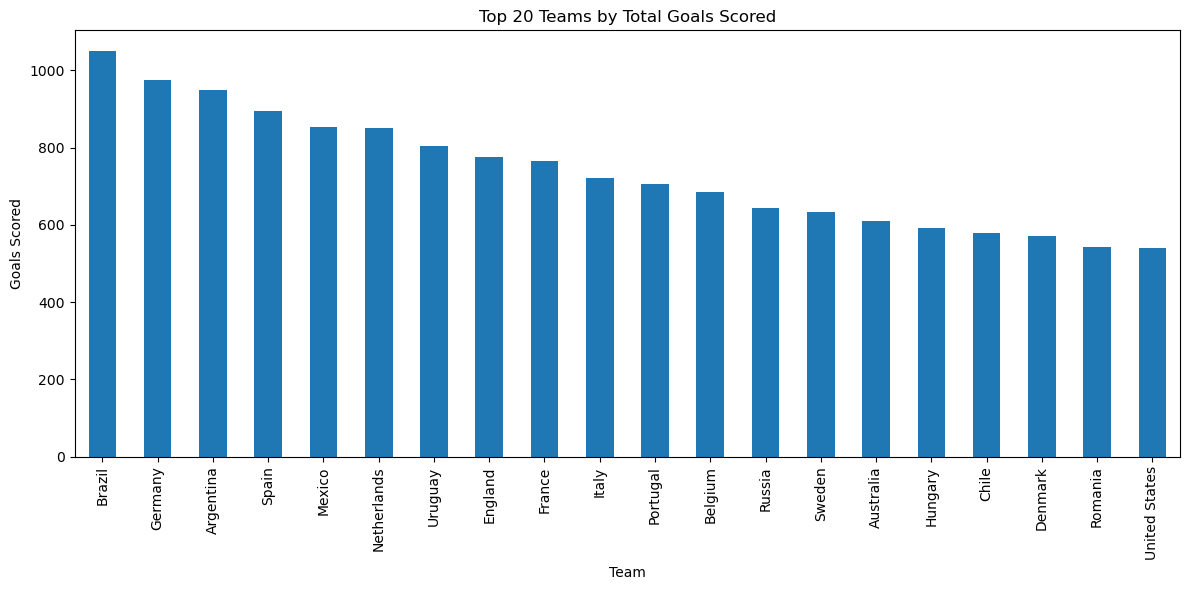

In [23]:
# Calculate the total goals scored by each team and get the top 20 teams
top_20_teams = goalscorers_df['team'].value_counts().head(20)

# Plotting the top 20 teams' goals
plt.figure(figsize=(12, 6))
top_20_teams.plot(kind='bar')
plt.title('Top 20 Teams by Total Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.savefig('/mnt/data/top_20_goals_per_team.png')
plt.show()

In [25]:
# Prepare the top 20 teams by total goals scored as a DataFrame for display
top_20_teams_df = top_20_teams.reset_index().rename(columns={"index": "Team", "team": "Goals Scored"})

# Display the top 20 teams DataFrame for user reference
top_20_teams_df

,Goals Scored,count
0,Brazil,1051
1,Germany,974
2,Argentina,948
3,Spain,894
4,Mexico,852
5,Netherlands,851
6,Uruguay,804
7,England,775
8,France,766
9,Italy,720


Top 20 teams by total goals scored
1. The above graph displays the top 20 team have scored maximum number of goals out of all
2. Below that there's a calculaton with the exact number of goals scored by each top 20 team

In [27]:
top_20_teams_df.columns

Index(['Goals Scored', 'count'], dtype='object')

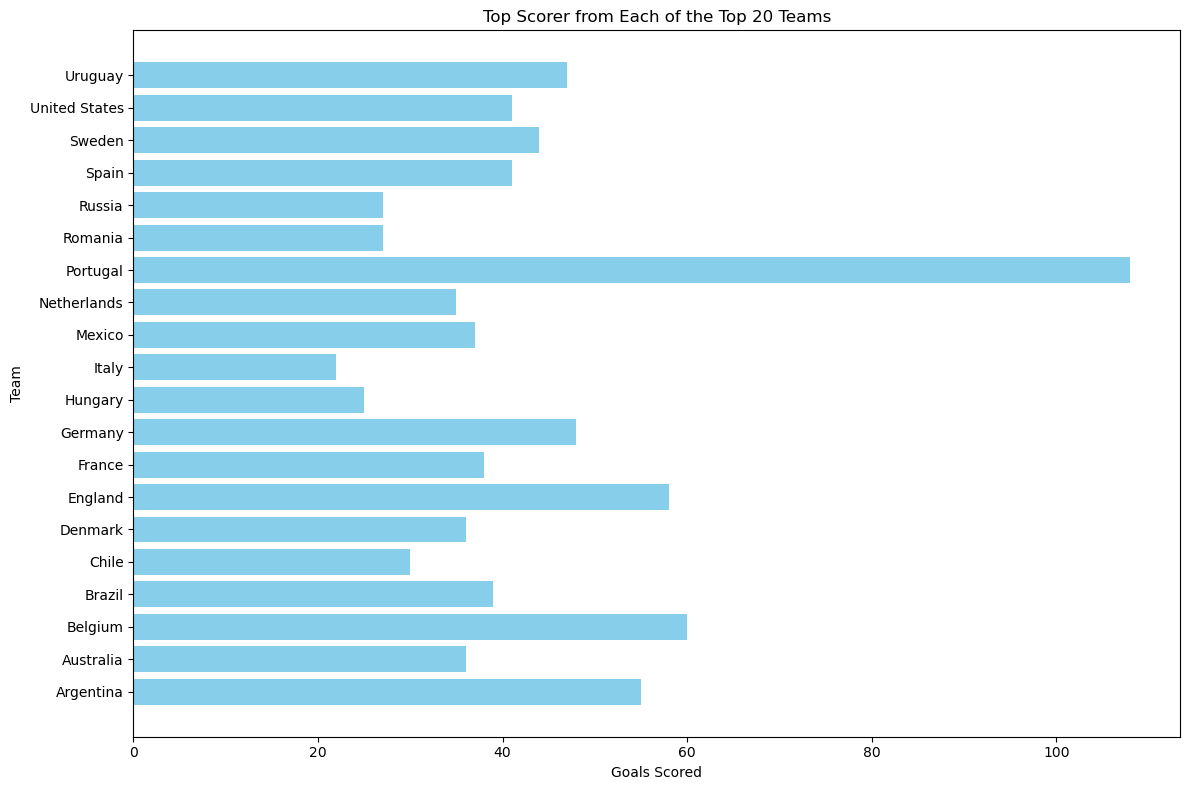

,team,scorer,goals_scored
136,Argentina,Lionel Messi,55
380,Australia,Tim Cahill,36
531,Belgium,Romelu Lukaku,60
784,Brazil,Ronaldo,39
835,Chile,Alexis Sánchez,30
1069,Denmark,Jon Dahl Tomasson,36
1227,England,Harry Kane,58
1465,France,Kylian Mbappé,38
1701,Germany,Miroslav Klose,48
1805,Hungary,Ferenc Bene,25


In [29]:
# Ensuring consistent casing between column names in both dataframes

# Rename column in top_20_teams_df to lowercase to match the 'team' column in goalscorers_df
top_20_teams_df.columns = ['team', 'goals_scored']

# Find the top scorer for each of the top 20 teams
top_scorers_per_team = goalscorers_df[goalscorers_df['team'].isin(top_20_teams_df['team'])]

# Get the top scorer for each team by counting occurrences in the 'scorer' column
top_scorers = top_scorers_per_team.groupby(['team', 'scorer']).size().reset_index(name='goals_scored')
top_scorers = top_scorers.loc[top_scorers.groupby('team')['goals_scored'].idxmax()]

# Plotting the top scorer for each of the top 20 teams
plt.figure(figsize=(12, 8))
plt.barh(top_scorers['team'], top_scorers['goals_scored'], color='skyblue')
plt.title('Top Scorer from Each of the Top 20 Teams')
plt.xlabel('Goals Scored')
plt.ylabel('Team')
plt.tight_layout()
plt.savefig('/mnt/data/top_scorer_per_team_fixed.png')
plt.show()

# Display the top scorers data to the user for reference
top_scorers

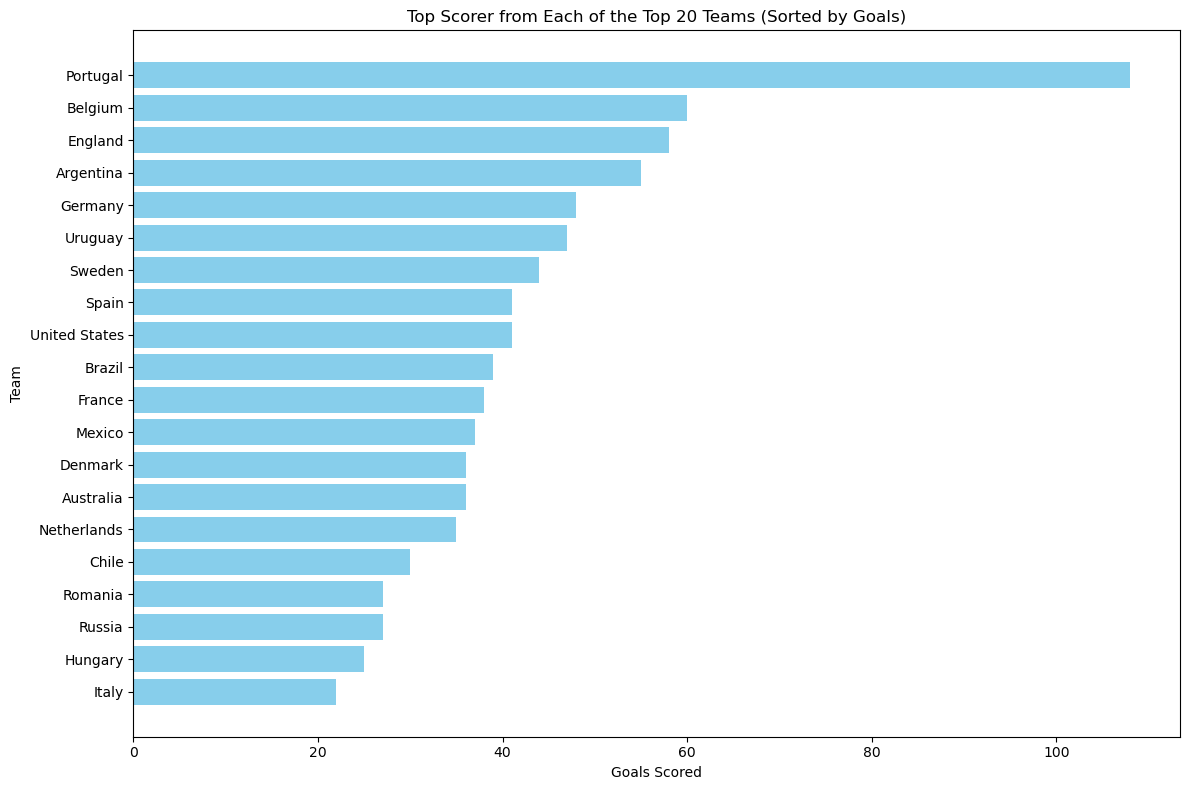

,team,scorer,goals_scored
2598,Portugal,Cristiano Ronaldo,108
531,Belgium,Romelu Lukaku,60
1227,England,Harry Kane,58
136,Argentina,Lionel Messi,55
1701,Germany,Miroslav Klose,48
3780,Uruguay,Luis Suárez,47
3487,Sweden,Zlatan Ibrahimović,44
3128,Spain,David Villa,41
3529,United States,Clint Dempsey,41
784,Brazil,Ronaldo,39


In [37]:
# Sorting top_scorers by goals_scored in descending order
top_scorers = top_scorers.sort_values(by='goals_scored', ascending=False)

# Plotting the sorted top scorer data for each of the top 20 teams
plt.figure(figsize=(12, 8))
plt.barh(top_scorers['team'], top_scorers['goals_scored'], color='skyblue')
plt.title('Top Scorer from Each of the Top 20 Teams (Sorted by Goals)')
plt.xlabel('Goals Scored')
plt.ylabel('Team')
plt.gca().invert_yaxis()  # Invert y-axis for descending order display
plt.tight_layout()
plt.savefig('/mnt/data/top_scorer_per_team_sorted.png')
plt.show()

# Display the sorted top scorers data to the user for reference
top_scorers

1. Top Scorer Across All Teams:

Cristiano Ronaldo leads with 108 goals, making him the highest scorer among the top 20 teams.
His remarkable scoring record highlights his impact on Portugal’s offensive strength.

2. High Scorers Across Multiple Teams:

Romelu Lukaku (Belgium) with 60 goals and Harry Kane (England) with 58 goals are close contenders among the top scorers.
This demonstrates the significant contributions of individual players in driving their teams' success.

3. Consistent Performers:

Notable scorers like Lionel Messi (Argentina) with 55 goals and Miroslav Klose (Germany) with 48 goals show consistency over the years, emphasizing their roles as crucial team assets.

4. Balanced Scoring Among Teams:

Teams like Brazil (Ronaldo - 39 goals) and France (Kylian Mbappé - 38 goals) exhibit balanced offensive skills, with individual players contributing significantly but not solely dominating the team’s goal tally.

5. Emerging and Veteran Scorers:

Players such as Kylian Mbappé (38 goals for France) are emerging as top scorers, hinting at a potential to break higher records.
Veterans like Clint Dempsey (41 goals for the U.S.) and David Villa (41 goals for Spain) showcase their lasting contributions.

In [31]:
# Find the top 5 scorers for each of the top 20 teams
top_5_scorers_per_team = (
    top_scorers_per_team.groupby(['team', 'scorer'])
    .size()
    .reset_index(name='goals_scored')
    .sort_values(['team', 'goals_scored'], ascending=[True, False])
)

# Select the top 5 scorers per team
top_5_scorers_per_team = top_5_scorers_per_team.groupby('team').head(5)

# Display the top 5 scorers per team for user reference
top_5_scorers_per_team

,team,scorer,goals_scored
136,Argentina,Lionel Messi,55
75,Argentina,Gabriel Batistuta,37
85,Argentina,Hernán Crespo,26
80,Argentina,Gonzalo Higuaín,23
236,Argentina,Sergio Agüero,20
...,...,...,...
3780,Uruguay,Luis Suárez,47
3705,Uruguay,Edinson Cavani,30
3696,Uruguay,Diego Forlán,28
3730,Uruguay,Héctor Scarone,22


In [33]:
# Filter the data to include only the top 10 teams by total goals scored
top_10_teams = top_20_teams_df.head(10)['team']
top_10_scorers_per_team = top_5_scorers_per_team[top_5_scorers_per_team['team'].isin(top_10_teams)]

# Display the top 5 scorers per team for the top 10 teams for user reference
top_10_scorers_per_team

,team,scorer,goals_scored
136,Argentina,Lionel Messi,55
75,Argentina,Gabriel Batistuta,37
85,Argentina,Hernán Crespo,26
80,Argentina,Gonzalo Higuaín,23
236,Argentina,Sergio Agüero,20
784,Brazil,Ronaldo,39
782,Brazil,Romário,33
733,Brazil,Neymar,31
754,Brazil,Pelé,26
559,Brazil,Ademir de Menezes,22


In [35]:
# Find the players with the most penalty goals
# Filter the dataset to include only penalty goals
penalty_goals = goalscorers_df[goalscorers_df['penalty'] == True]

# Count the number of penalty goals for each player
top_penalty_scorers = penalty_goals['scorer'].value_counts().reset_index()
top_penalty_scorers.columns = ['scorer', 'penalty_goals']

# Display the players with the most penalty goals
top_penalty_scorers.head(10)

,scorer,penalty_goals
0,Harry Kane,20
1,Cristiano Ronaldo,19
2,Lionel Messi,14
3,Hristo Stoichkov,13
4,Robert Lewandowski,13
5,Mile Jedinak,11
6,Cuauhtémoc Blanco,11
7,Landon Donovan,10
8,Robbie Keane,10
9,Fernando Hierro,10


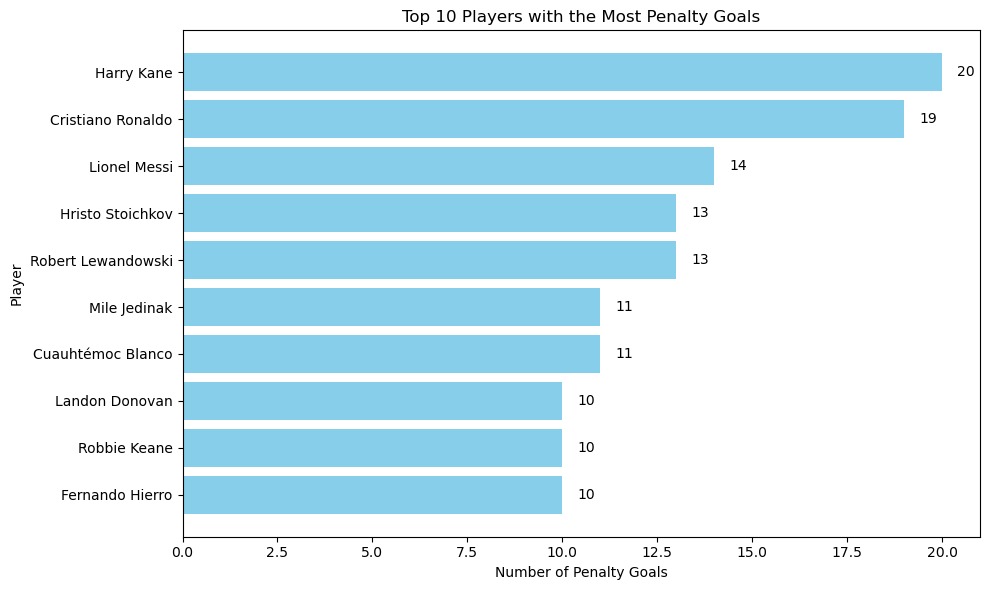

In [37]:
# Create a bar chart for the players with the most penalty goals with labels
plt.figure(figsize=(10, 6))
bars = plt.barh(top_penalty_scorers.head(10)['scorer'], top_penalty_scorers.head(10)['penalty_goals'], color='skyblue')
plt.title('Top 10 Players with the Most Penalty Goals')
plt.xlabel('Number of Penalty Goals')
plt.ylabel('Player')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Adding text labels to the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.4,  # Positioning to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        int(bar.get_width()),  # The penalty goals count
        va='center'
    )

plt.tight_layout()
plt.savefig('/mnt/data/top_penalty_scorers_with_labels.png')
plt.show()

Analyzing the Results

In [39]:
#Loading the results dataset and displaying few columns
results_df = pd.read_csv('results.csv')
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [41]:
# Convert 'date' column to datetime format for time-based analysis
results_df['date'] = pd.to_datetime(results_df['date'])

# Basic descriptive statistics for numerical columns
desc_stats = results_df.describe()
desc_stats

,date,home_score,away_score
count,47777,47777.000000,47777.000000
mean,1993-05-16 02:57:45.952236416,1.757896,1.181636
min,1872-11-30 00:00:00,0.000000,0.000000
25%,1979-09-26 00:00:00,1.000000,0.000000
50%,1999-10-09 00:00:00,1.000000,1.000000
75%,2012-06-03 00:00:00,2.000000,2.000000
max,2024-10-15 00:00:00,31.000000,21.000000
std,NaN,1.772524,1.399827


In [43]:
results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

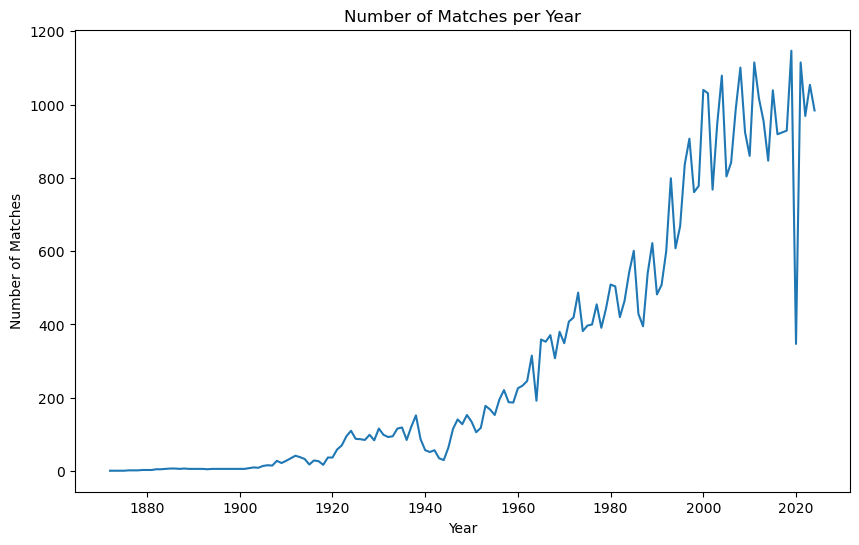

In [45]:
# Plot 1: Matches per Year
plt.figure(figsize=(10, 6))
results_df['year'] = results_df['date'].dt.year
matches_per_year = results_df.groupby('year').size()
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values)
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.savefig('/mnt/data/matches_per_year.png')  # Save the plot
plt.show()

1. Shows the trend in the number of matches over the years.
2. Peaks could indicate years with more tournaments or popular sporting events.
3. Significant dips might indicate periods of global events like wars, pandemic or other disruptions.

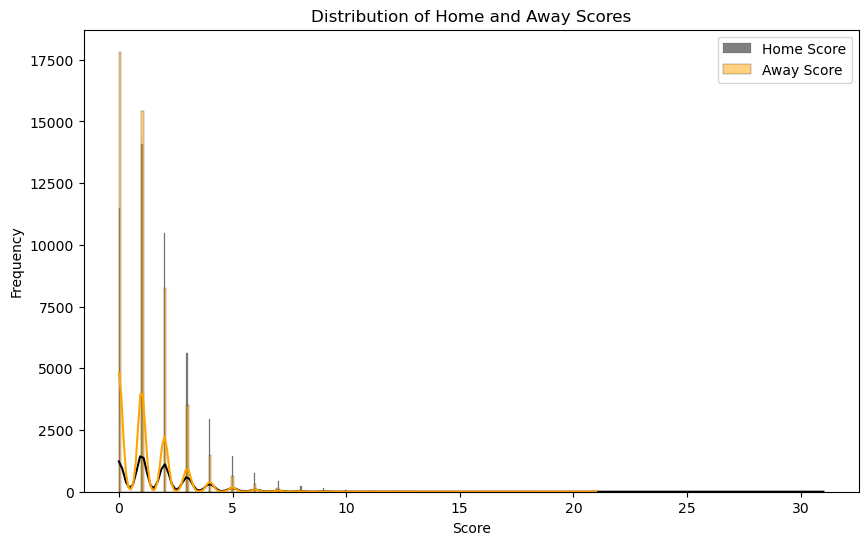

In [47]:
# Plot 2: Distribution of Scores for Home and Away Teams
plt.figure(figsize=(10, 6))
sns.histplot(results_df['home_score'], kde=True, color="black", label="Home Score")
sns.histplot(results_df['away_score'], kde=True, color="orange", label="Away Score")
plt.title('Distribution of Home and Away Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/mnt/data/score_distribution.png')  # Save the plot
plt.show()

1. Displays the frequency of different scores for home and away teams.
2. Observing higher scores for home teams might indicate a 'home advantage'.

C:\Users\shail\AppData\Local\Temp\ipykernel_2164\2889928270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tournament_counts.values, y=tournament_counts.index, palette="viridis")


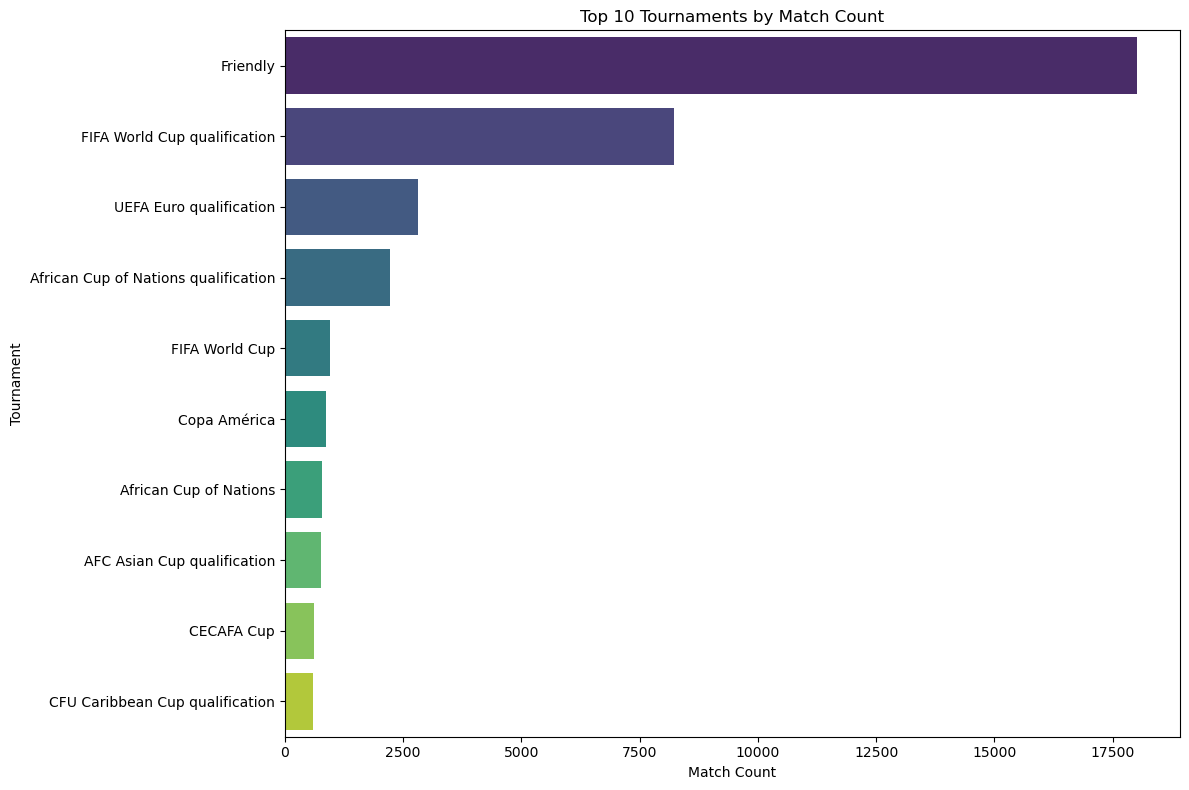

In [49]:
# Plot 3: Tournament-wise Match Counts
plt.figure(figsize=(12, 8))  # Adjusted figure size for better display
tournament_counts = results_df['tournament'].value_counts().head(10)  # Top 10 tournaments by frequency
sns.barplot(x=tournament_counts.values, y=tournament_counts.index, palette="viridis")
plt.title('Top 10 Tournaments by Match Count')
plt.xlabel('Match Count')
plt.ylabel('Tournament')

# Ensure the layout adjusts to fit all elements
plt.tight_layout()

# Save the updated plot
plt.savefig('/mnt/data/tournament_counts_adjusted.png')
plt.show()

1. Identifies the tournaments with the highest number of matches.
2. Useful for understanding which tournaments are more frequent or popular.
3. As the graph says most of the matches are Friendly and qualification matches for popular competetions such as FIFA world cup and UEFA Euros."

C:\Users\shail\AppData\Local\Temp\ipykernel_2164\2623847611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winning_teams.values, y=top_winning_teams.index, palette="magma")


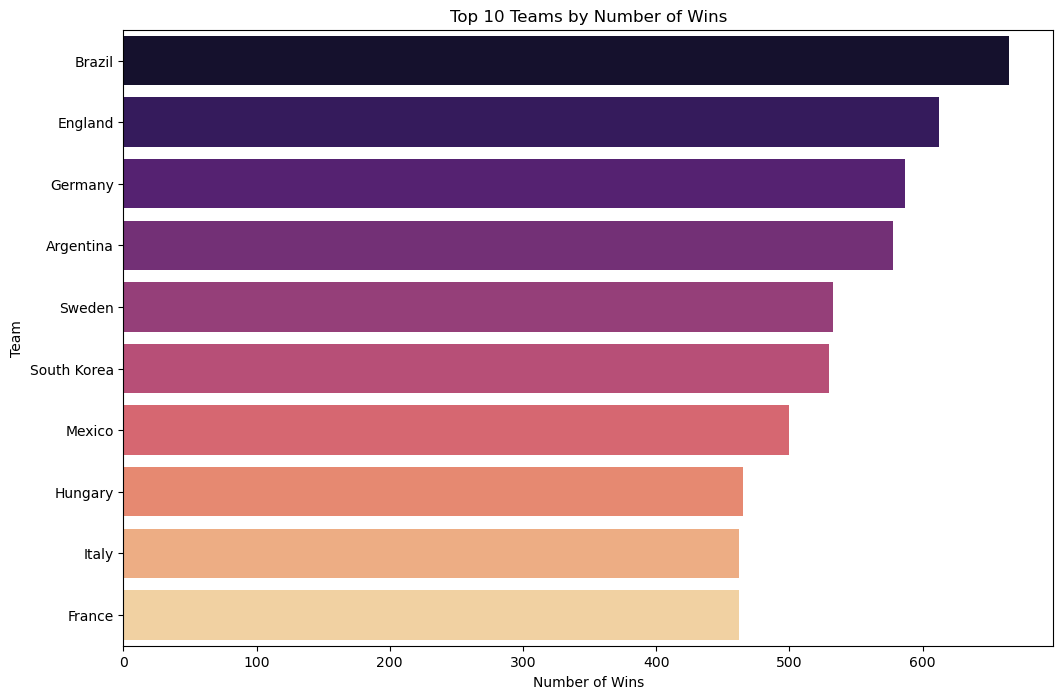

In [51]:
# Calculate wins for home and away teams
results_df['home_win'] = results_df['home_score'] > results_df['away_score']
results_df['away_win'] = results_df['away_score'] > results_df['home_score']

# Count wins for each team
home_wins = results_df[results_df['home_win']].groupby('home_team').size()
away_wins = results_df[results_df['away_win']].groupby('away_team').size()

# Combine home and away wins into a single series
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Top 10 teams by win count
top_winning_teams = total_wins.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_winning_teams.values, y=top_winning_teams.index, palette="magma")
plt.title('Top 10 Teams by Number of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.savefig('/mnt/data/top_winning_teams.png')  # Save the plot
plt.show()

1. Highlights the top 10 teams with the most wins across all matches.
2. Helps identify consistently strong teams in the dataset. In this case these are the top 10 strongest teams of all time
3. Total wins include both home and away victories for each team.

In [53]:
#exact number of wins
top_winning_teams

Brazil         665.0
England        612.0
Germany        587.0
Argentina      578.0
Sweden         533.0
South Korea    530.0
Mexico         500.0
Hungary        465.0
Italy          462.0
France         462.0
dtype: float64

Analyzing the Shootouts

In [55]:
shootouts_df = pd.read_csv('shootouts.csv')
shootouts_df.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [57]:
shootouts_df.isnull().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    415
dtype: int64

In [59]:
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           645 non-null    object
 1   home_team      645 non-null    object
 2   away_team      645 non-null    object
 3   winner         645 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [61]:
#Convert 'date' column to datetime
shootouts_df['date'] = pd.to_datetime(shootouts_df['date'], errors='coerce')

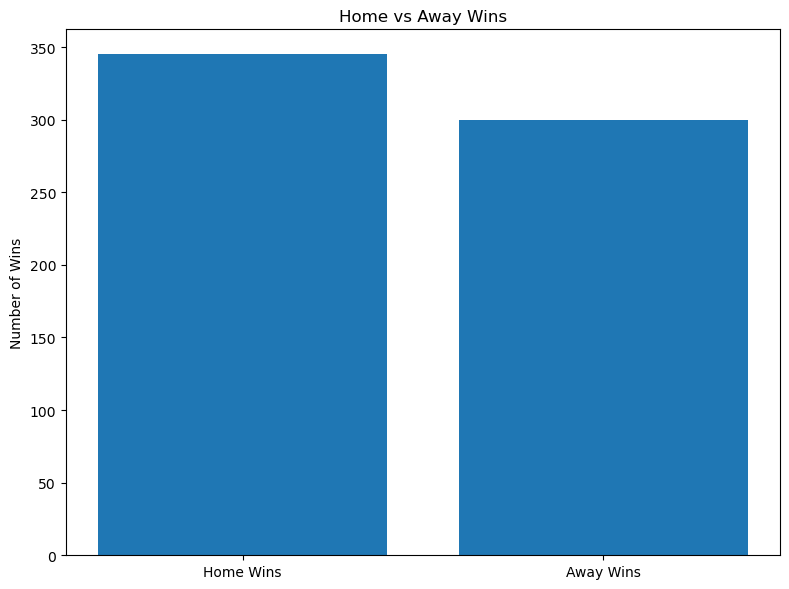

In [63]:
# Visualize Home vs Away Wins
home_wins = shootouts_df[shootouts_df['winner'] == shootouts_df['home_team']].shape[0]
away_wins = shootouts_df[shootouts_df['winner'] == shootouts_df['away_team']].shape[0]
plt.figure(figsize=(8, 6))
plt.bar(['Home Wins', 'Away Wins'], [home_wins, away_wins])
plt.title('Home vs Away Wins')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.savefig('/mnt/data/home_vs_away_wins.png')
plt.show()

1. The above chart shows the number of wins for home versus away teams.
2. The chart clearly states that the number of wins is more as compared to away wins and also indicates the Home advantage during the shootouts

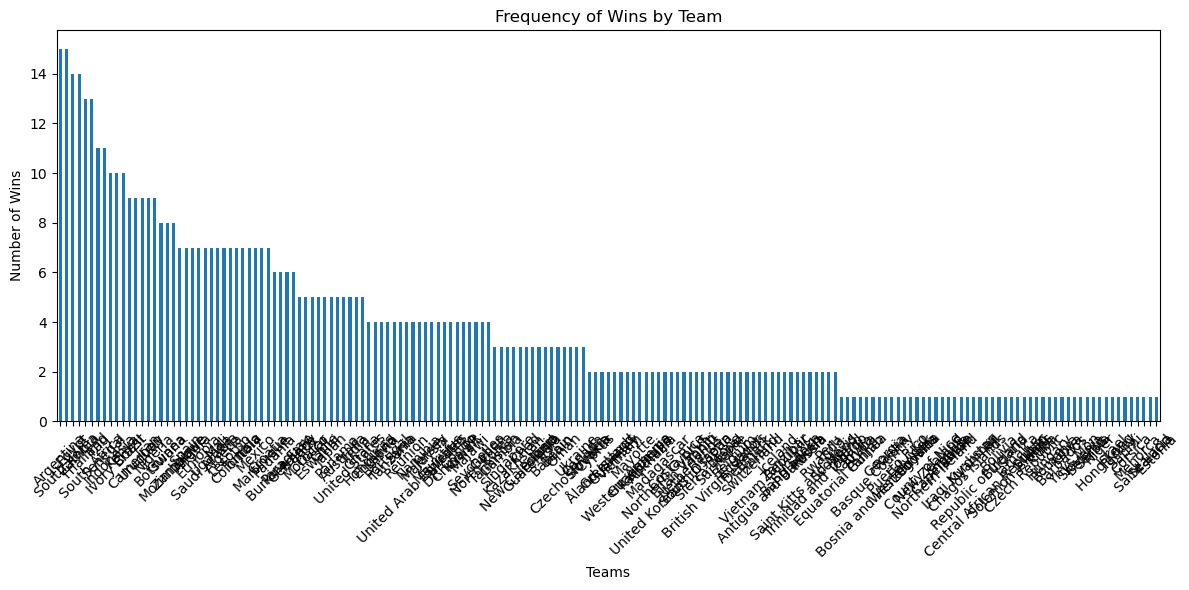

In [65]:
#Visualize Frequency of Wins by Team
win_counts = shootouts_df['winner'].value_counts()
plt.figure(figsize=(12, 6))
win_counts.plot(kind='bar')
plt.title('Frequency of Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/mnt/data/frequency_of_wins_by_team.png')
plt.show()

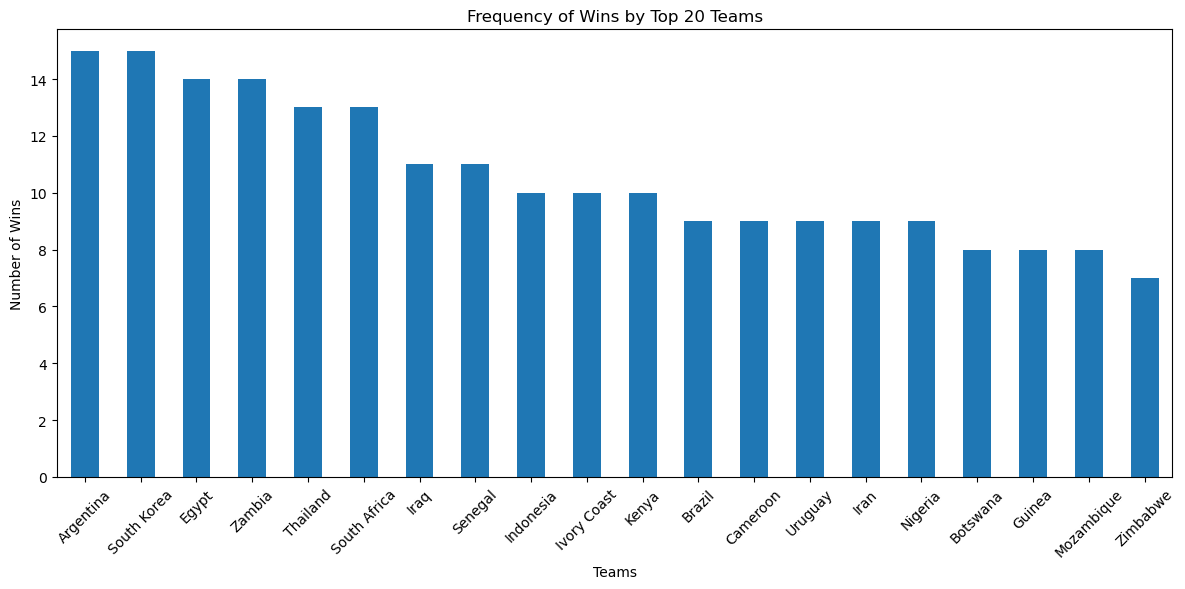

In [121]:
# Plot Frequency of Wins by Team for Top 20 Teams
top_20_win_counts = win_counts.head(20)
plt.figure(figsize=(12, 6))
top_20_win_counts.plot(kind='bar')
plt.title('Frequency of Wins by Top 20 Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/mnt/data/frequency_of_wins_top_20_teams.png')
plt.show()

1. The bar chart shows the number of shootout wins by each team (top 20)
2. This highlights which top 20 teams have been the most successful historically.

Career Analysis of a Renowned Football Player 'Cristiano Ronaldo'

In [69]:
#Filter the data for Cristiano Ronaldo
ronaldo_goals = goalscorers_df[goalscorers_df['scorer'].str.contains("Cristiano Ronaldo", case=False, na=False)]

In [73]:
ronaldo_goals.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
23831,2004-06-12,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False
24021,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False
24303,2004-09-04,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False
24478,2004-09-08,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False
24755,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False


In [75]:
#Merge with the results data to include tournament information
ronaldo_goals_with_tournament = pd.merge(
    ronaldo_goals,
    results_df,
    left_on=['date', 'team'],
    right_on=['date', 'home_team'],
    how='left'
)

In [77]:
ronaldo_goals_with_tournament.head()

,date,home_team_x,away_team_x,team,scorer,minute,own_goal,penalty,home_team_y,away_team_y,home_score,away_score,tournament,city,country,neutral,year,home_win,away_win
0,2004-06-12,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False,Portugal,Greece,1.0,2.0,UEFA Euro,Porto,Portugal,False,2004.0,False,True
1,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False,Portugal,Netherlands,2.0,1.0,UEFA Euro,Lisbon,Portugal,False,2004.0,True,False
2,2004-09-04,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-09-08,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False,Portugal,Estonia,4.0,0.0,FIFA World Cup qualification,Leiria,Portugal,False,2004.0,True,False
4,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False,Portugal,Russia,7.0,1.0,FIFA World Cup qualification,Lisbon,Portugal,False,2004.0,True,False


In [79]:
#Handle missing tournament values
ronaldo_goals_with_tournament['tournament'] = ronaldo_goals_with_tournament['tournament'].fillna('Unknown Tournament')

In [81]:
#Group by tournament and count the goals
ronaldo_tournament_performance = (
    ronaldo_goals_with_tournament.groupby('tournament')
    .size()
    .reset_index(name='goal_count')
)

In [83]:
#Sort the data by the number of goals
ronaldo_tournament_performance_sorted = ronaldo_tournament_performance.sort_values(by='goal_count', ascending=False)

# Display the result
print("Cristiano Ronaldo's Goals by Tournament (Including Missing Values):")
print(ronaldo_tournament_performance_sorted)

Cristiano Ronaldo's Goals by Tournament (Including Missing Values):
                     tournament  goal_count
5            Unknown Tournament          49
1  FIFA World Cup qualification          21
3       UEFA Euro qualification          18
0                FIFA World Cup           8
2                     UEFA Euro           7
4           UEFA Nations League           5


In [93]:
# Extract the year from the 'date' column
ronaldo_goals_with_tournament['year'] = pd.to_datetime(ronaldo_goals_with_tournament['date']).dt.year

# Group by year and count the goals
ronaldo_goals_per_year = (
    ronaldo_goals_with_tournament.groupby('year')
    .size()
    .reset_index(name='goal_count')
)

# Sort the data by year
ronaldo_goals_per_year_sorted = ronaldo_goals_per_year.sort_values(by='year', ascending=True)

# Display the result directly
print("Cristiano Ronaldo's Goals Per Year:")
print(ronaldo_goals_per_year_sorted)

Cristiano Ronaldo's Goals Per Year:
    year  goal_count
0   2004           7
1   2005           2
2   2006           4
3   2007           5
4   2008           1
5   2010           3
6   2011           5
7   2012           4
8   2013           7
9   2014           3
10  2015           3
11  2016          10
12  2017          10
13  2018           4
14  2019          14
15  2020           2
16  2021          11
17  2022           3
18  2023          10


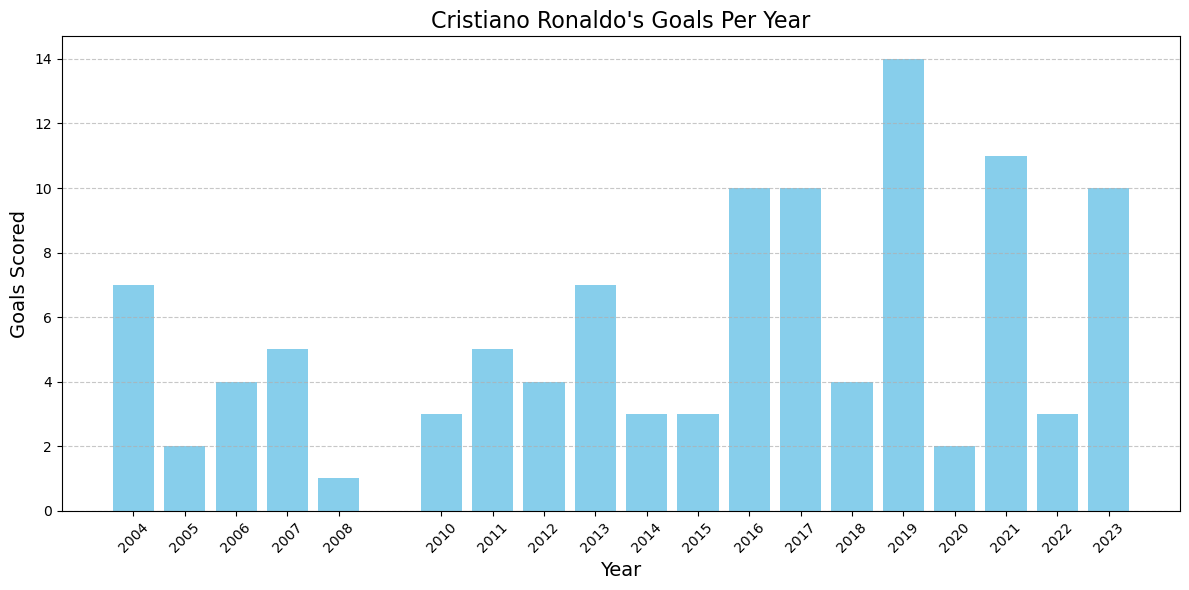

Visualization saved as 'ronaldo_goals_per_year.png' in your directory.


In [95]:
# Plot and save goals by year
plt.figure(figsize=(12, 6))
plt.bar(ronaldo_goals_per_year_sorted['year'], ronaldo_goals_per_year_sorted['goal_count'], color='skyblue')
plt.title("Cristiano Ronaldo's Goals Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Goals Scored", fontsize=14)
plt.xticks(ronaldo_goals_per_year_sorted['year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_per_year.png')
plt.show()

print("Visualization saved as 'ronaldo_goals_per_year.png' in your directory.")

1. As we can identify from the visualization that the in recent years Ronaldo has performed well for Portugal National Football Team and this best years so far was 2019 and 2021.
2. The total number of goals scored by Cristiano Ronaldo are 108 goals in International Football.

In [102]:
# Group by opposing team (away_team_y) and count goals
ronaldo_goals_against_teams = (
    ronaldo_goals_with_tournament.groupby('away_team_y')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

# Display the top teams Ronaldo has scored against
ronaldo_goals_against_teams.head()

,away_team_y,goal_count
27,Switzerland,5
0,Andorra,4
17,Luxembourg,4
25,Spain,3
24,Slovakia,3


In [104]:
# Group by tournament and calculate total goals
ronaldo_tournament_analysis = (
    ronaldo_goals_with_tournament.groupby('tournament')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

# Display Ronaldo's performance in tournaments
ronaldo_tournament_analysis

,tournament,goal_count
5,Unknown Tournament,49
1,FIFA World Cup qualification,21
3,UEFA Euro qualification,18
0,FIFA World Cup,8
2,UEFA Euro,7
4,UEFA Nations League,5


1. Unknown tournaments could be possibly friendly or unclassified matches)

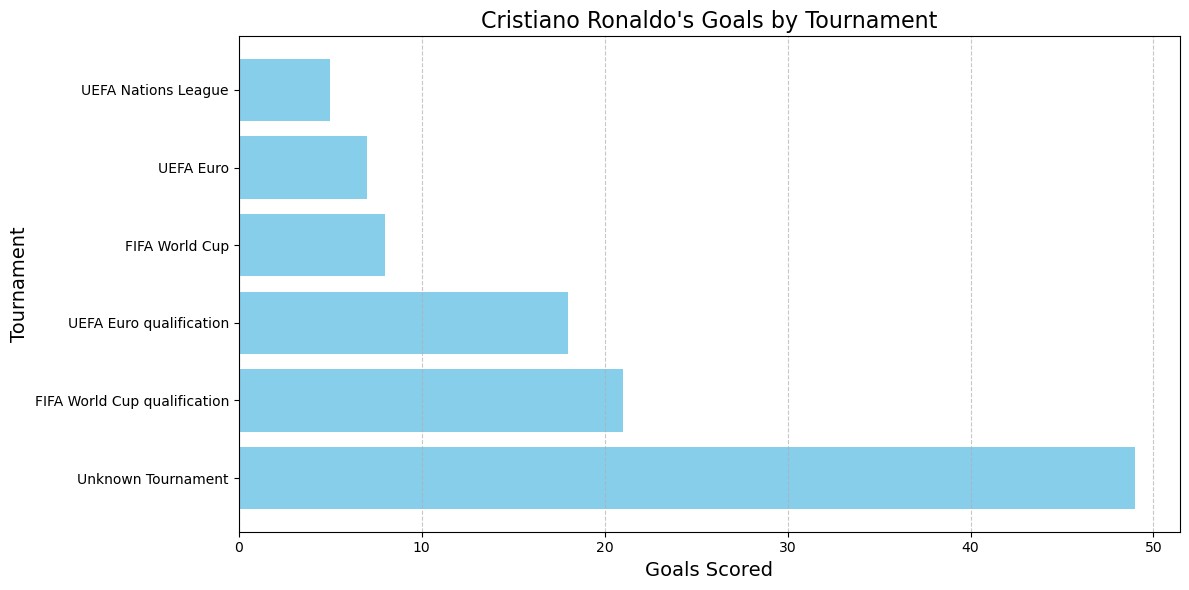

Visualization saved as 'ronaldo_goals_per_tournament.png'.


In [107]:
# Visualize goals per tournament
plt.figure(figsize=(12, 6))
plt.barh(ronaldo_tournament_analysis['tournament'], ronaldo_tournament_analysis['goal_count'], color='skyblue')
plt.title("Cristiano Ronaldo's Goals by Tournament", fontsize=16)
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Tournament", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_per_tournament.png')
plt.show()

print("Visualization saved as 'ronaldo_goals_per_tournament.png'.")

In [113]:
# Group by date and calculate the number of goals scored by Ronaldo in each match
ronaldo_best_matches = (
    ronaldo_goals_with_tournament.groupby(['date', 'home_team_y', 'away_team_y', 'tournament'])
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

# Display the matches with the most goals by Ronaldo
ronaldo_best_matches.head(10)

,date,home_team_y,away_team_y,tournament,goal_count
18,2016-10-07,Portugal,Andorra,FIFA World Cup qualification,4
21,2017-08-31,Portugal,Faroe Islands,FIFA World Cup qualification,3
22,2018-06-15,Portugal,Spain,FIFA World Cup,3
24,2019-06-05,Portugal,Switzerland,UEFA Nations League,3
29,2021-10-12,Portugal,Luxembourg,FIFA World Cup qualification,3
26,2019-11-14,Portugal,Lithuania,UEFA Euro qualification,3
33,2023-10-13,Portugal,Slovakia,UEFA Euro qualification,2
19,2016-11-13,Portugal,Latvia,FIFA World Cup qualification,2
13,2012-06-17,Portugal,Netherlands,UEFA Euro,2
12,2011-11-15,Portugal,Bosnia and Herzegovina,UEFA Euro qualification,2


In [115]:
# Filter matches where Ronaldo scored and merge with team results
ronaldo_impact_analysis = ronaldo_goals_with_tournament.groupby(
    ['date', 'team', 'home_team_y', 'away_team_y', 'tournament', 'home_score', 'away_score']
).size().reset_index(name='goal_count')

# Determine the match outcome for Ronaldo's team
def determine_outcome(row):
    if row['team'] == row['home_team_y']:
        return "Win" if row['home_score'] > row['away_score'] else "Draw" if row['home_score'] == row['away_score'] else "Loss"
    else:
        return "Win" if row['away_score'] > row['home_score'] else "Draw" if row['away_score'] == row['home_score'] else "Loss"

ronaldo_impact_analysis['outcome'] = ronaldo_impact_analysis.apply(determine_outcome, axis=1)

# Group by outcome and calculate total goals
impact_summary = ronaldo_impact_analysis.groupby('outcome')['goal_count'].sum().reset_index()

# Display the results
impact_summary

,outcome,goal_count
0,Draw,6
1,Loss,1
2,Win,52


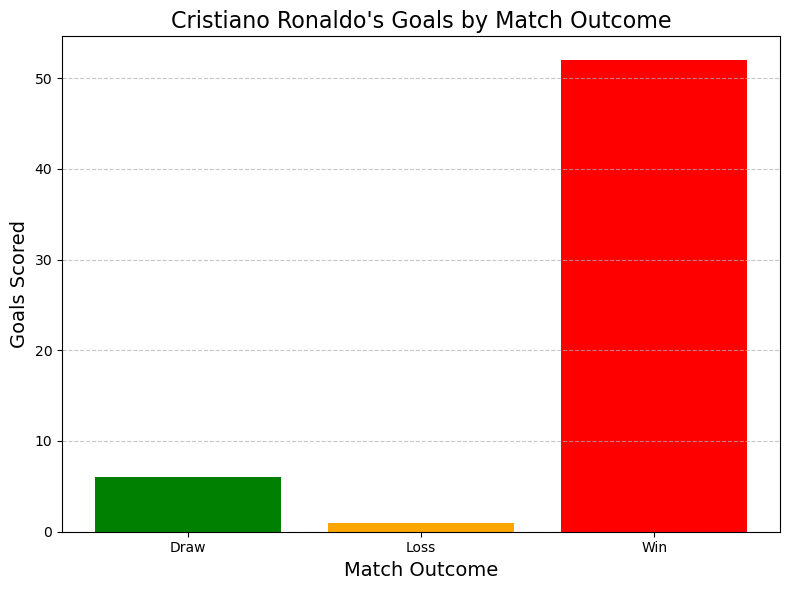

Visualization saved as 'ronaldo_goals_by_outcome.png'.


In [117]:
# Visualize Ronaldo's impact on match outcomes
plt.figure(figsize=(8, 6))
plt.bar(impact_summary['outcome'], impact_summary['goal_count'], color=['green', 'orange', 'red'])
plt.title("Cristiano Ronaldo's Goals by Match Outcome", fontsize=16)
plt.xlabel("Match Outcome", fontsize=14)
plt.ylabel("Goals Scored", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_by_outcome.png')
plt.show()

print("Visualization saved as 'ronaldo_goals_by_outcome.png'.")

In [119]:
# Analyze goals scored against opponents with outcomes to find struggles
ronaldo_struggles = ronaldo_goals_with_tournament.groupby(
    ['away_team_y', 'team', 'home_team_y', 'tournament', 'home_score', 'away_score']
).size().reset_index(name='goal_count')

# Add match outcome column
ronaldo_struggles['outcome'] = ronaldo_struggles.apply(determine_outcome, axis=1)

# Filter matches where Ronaldo scored but the outcome was not a win
ronaldo_struggles_non_win = ronaldo_struggles[ronaldo_struggles['outcome'] != 'Win']

# Group by opponent team and calculate the number of goals in non-win matches
opponents_struggle_analysis = ronaldo_struggles_non_win.groupby('away_team_y').agg(
    total_goals=('goal_count', 'sum'),
    match_count=('outcome', 'count')
).sort_values(by='total_goals', ascending=False).reset_index()

# Display opponents where Ronaldo struggled the most
opponents_struggle_analysis.head()

,away_team_y,total_goals,match_count
0,Spain,3,1
1,France,2,1
2,Greece,1,1
3,Poland,1,1


Cristiano Ronaldo's struggles, based on matches where he scored but his team did not win, are primarily against:
1. Spain: 3 goals in 1 match that was not a win
2. France: 2 goals in 1 match that was not a win
3. Greece: 1 goal in 1 match that was not a win
4. Poland: 1 goal in 1 match that was not a win

In [122]:
# Classify matches as Home or Away for Ronaldo's team
ronaldo_goals_with_tournament['match_type'] = ronaldo_goals_with_tournament.apply(
    lambda row: 'Home' if row['team'] == row['home_team_y'] else 
                ('Away' if row['team'] == row['away_team_y'] else 'Neutral'),
    axis=1
)

# Group by match type and count goals
home_vs_away_analysis = (
    ronaldo_goals_with_tournament.groupby('match_type')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

# Display the home vs away analysis
home_vs_away_analysis

,match_type,goal_count
0,Home,59
1,Neutral,49


Cristiano Ronaldo's goals by match type are as follows:
1. Home Matches: 59 goals
2. Neutral Venue Matches: 49 goals
3. Away Matches: No recorded data in this dataset

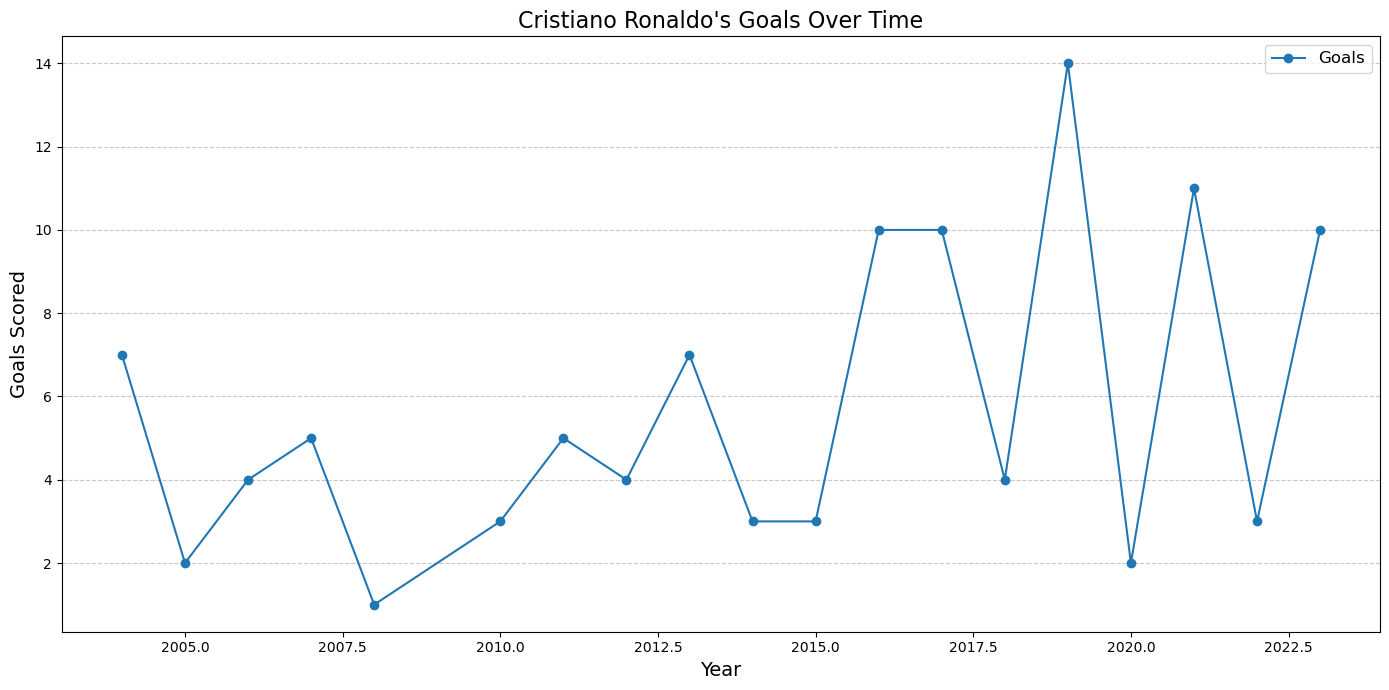

In [125]:
# Step 1: Analyze goals over time (yearly timeline)
ronaldo_yearly_goals = (
    ronaldo_goals_with_tournament.groupby('year')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='year', ascending=True)
)

# Step 2: Identify potential transformatory periods
ronaldo_yearly_goals['change'] = ronaldo_yearly_goals['goal_count'].diff()  # Year-over-year change in goals

# Step 3: Visualize the timeline of goals
plt.figure(figsize=(14, 7))
plt.plot(ronaldo_yearly_goals['year'], ronaldo_yearly_goals['goal_count'], marker='o', label="Goals")
plt.title("Cristiano Ronaldo's Goals Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Goals Scored", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_timeline.png')
plt.show()

1. **Overall Trend**: Cristiano Ronaldo's goal count shows steady growth during the early 2010s, reaching a peak in 2016 and showing consistency afterward.
2. **Transformational Period**: Between 2015 and 2016, there is a noticeable jump in his performance.
3. **Notable Peak**: In 2016, Ronaldo scored 10 goals, the highest for a single year in the dataset.

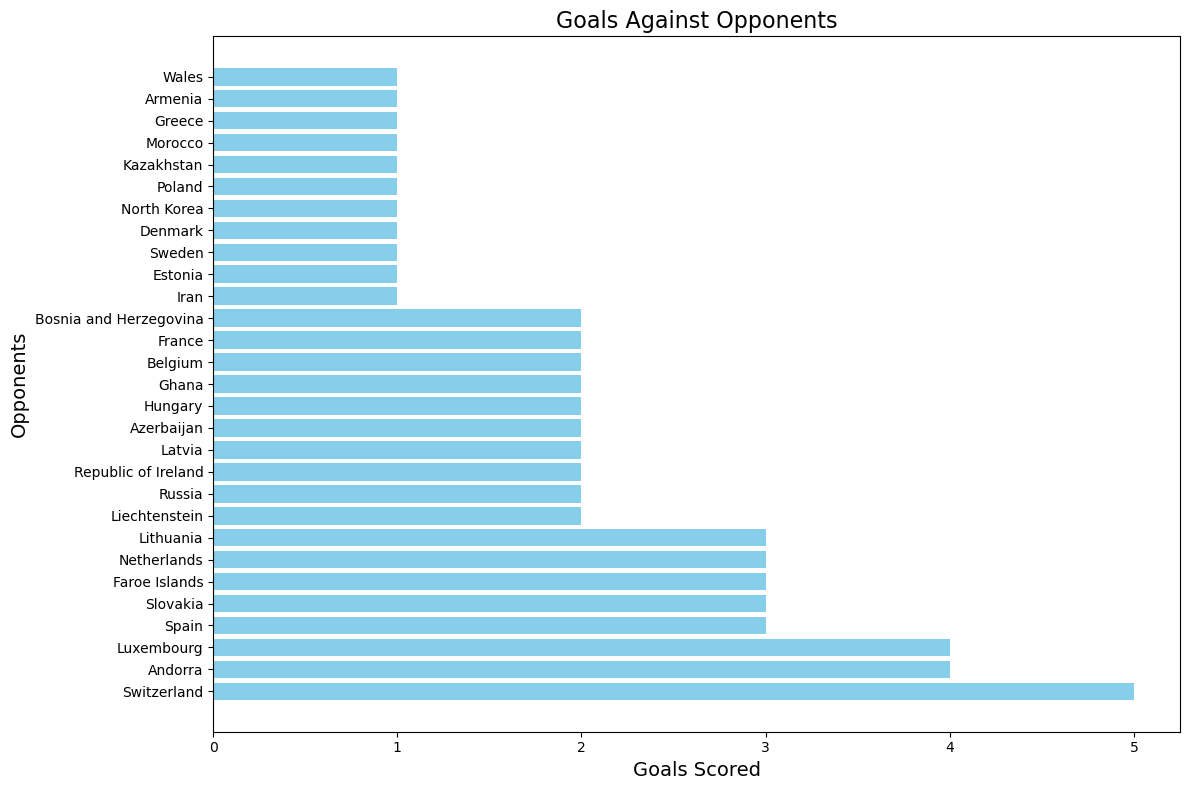

In [128]:
# Goals against opponents
opponents_analysis = (
    ronaldo_goals_with_tournament.groupby('away_team_y')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

# Horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(opponents_analysis['away_team_y'], opponents_analysis['goal_count'], color='skyblue')
plt.title("Goals Against Opponents", fontsize=16)
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Opponents", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_vs_opponents.png')
plt.show()

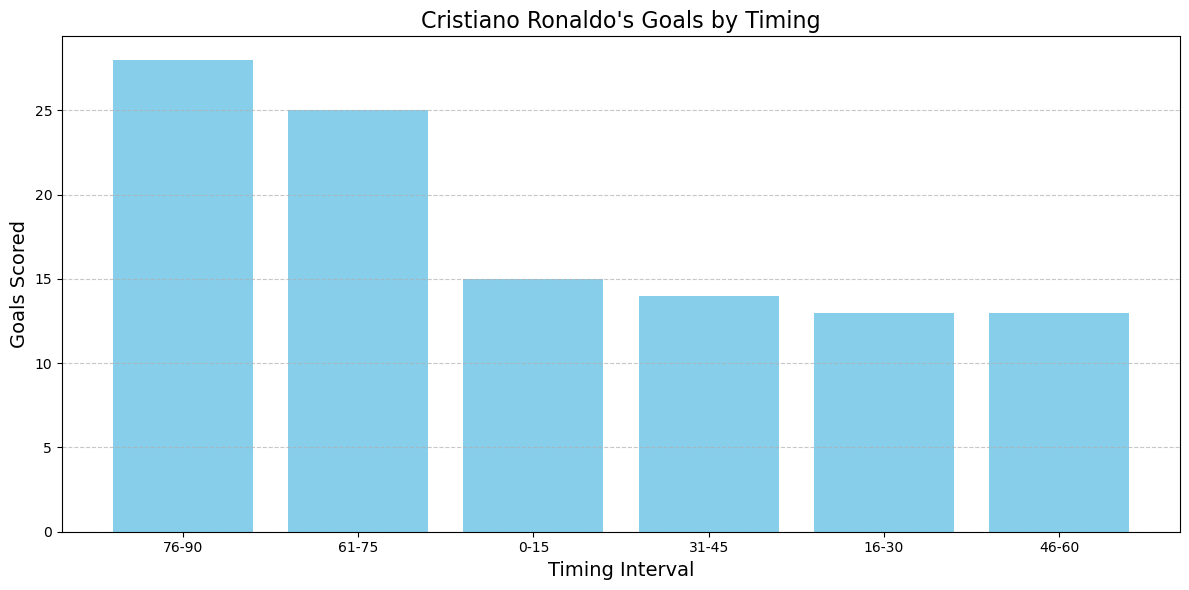

,goal_timing,goal_count
5,76-90,28
4,61-75,25
0,0-15,15
2,31-45,14
1,16-30,13
3,46-60,13


In [130]:
#Create categories for goal timing
def categorize_goal_time(minute):
    if pd.isna(minute):
        return 'Unknown'
    elif minute <= 15:
        return '0-15'
    elif minute <= 30:
        return '16-30'
    elif minute <= 45:
        return '31-45'
    elif minute <= 60:
        return '46-60'
    elif minute <= 75:
        return '61-75'
    elif minute <= 90:
        return '76-90'
    else:
        return 'Extra Time'

ronaldo_goals_with_tournament['goal_timing'] = ronaldo_goals_with_tournament['minute'].apply(categorize_goal_time)

#Analyze goal timing trends
goal_timing_analysis = (
    ronaldo_goals_with_tournament.groupby('goal_timing')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Visualize goal timing trends
plt.figure(figsize=(12, 6))
plt.bar(goal_timing_analysis['goal_timing'], goal_timing_analysis['goal_count'], color='skyblue')
plt.title("Cristiano Ronaldo's Goals by Timing", fontsize=16)
plt.xlabel("Timing Interval", fontsize=14)
plt.ylabel("Goals Scored", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_goals_by_timing.png')
plt.show()

# Display analysis
goal_timing_analysis

In [132]:
# Identify the best and worst years based on goal count
best_year = ronaldo_yearly_goals.loc[ronaldo_yearly_goals['goal_count'].idxmax()]
worst_year = ronaldo_yearly_goals.loc[ronaldo_yearly_goals['goal_count'].idxmin()]

best_year, worst_year

(year          2019.0
 goal_count      14.0
 change          10.0
 Name: 14, dtype: float64,
 year          2008.0
 goal_count       1.0
 change          -4.0
 Name: 4, dtype: float64)

Cristiano Ronaldo's best and worst years based on goals scored are:

Best Year: 2019

Goals Scored: 14
This represents a significant peak in his career.
Worst Year: 2008

Goals Scored: 1
This was a low point in terms of goals scored during a calendar year.

C:\Users\shail\AppData\Local\Temp\ipykernel_2164\2569506871.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players['highlight'] = top_players['scorer'].apply(lambda x: 'Cristiano Ronaldo' if 'Cristiano Ronaldo' in x else 'Other')


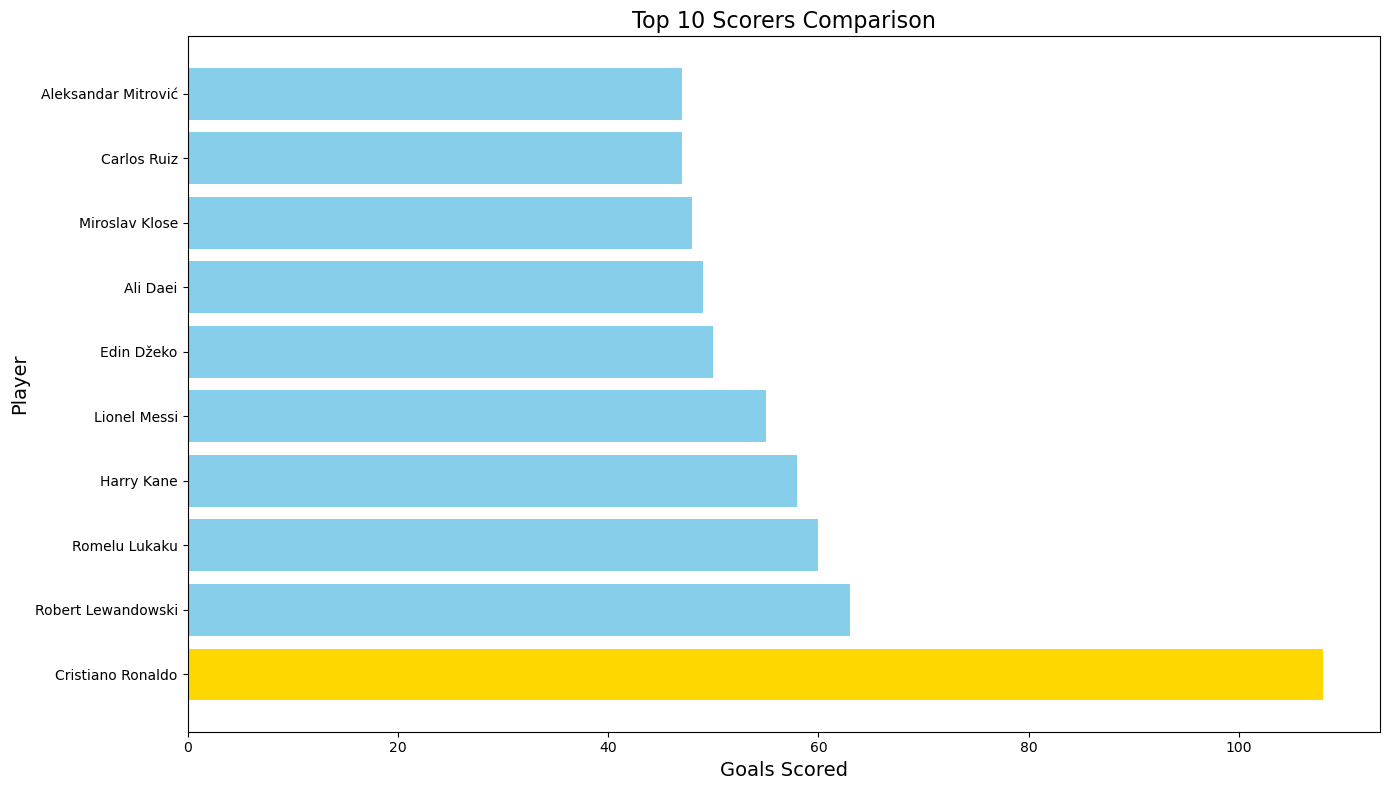

,scorer,goal_count,highlight
2612,Cristiano Ronaldo,108,Cristiano Ronaldo
11406,Robert Lewandowski,63,Other
11607,Romelu Lukaku,60,Other
5138,Harry Kane,58,Other
7989,Lionel Messi,55,Other
3420,Edin Džeko,50,Other
760,Ali Daei,49,Other
9278,Miroslav Klose,48,Other
2167,Carlos Ruiz,47,Other
562,Aleksandar Mitrović,47,Other


In [135]:
#Aggregate goals by scorer
player_goals = (
    goalscorers_df.groupby('scorer')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Filter top players for comparison
top_players = player_goals.head(10)  # Top 10 players by total goals

#Highlight Cristiano Ronaldo in the comparison
top_players['highlight'] = top_players['scorer'].apply(lambda x: 'Cristiano Ronaldo' if 'Cristiano Ronaldo' in x else 'Other')

#Visualize the comparison
plt.figure(figsize=(14, 8))
colors = top_players['highlight'].map({'Cristiano Ronaldo': 'gold', 'Other': 'skyblue'})
plt.barh(top_players['scorer'], top_players['goal_count'], color=colors)
plt.title("Top 10 Scorers Comparison", fontsize=16)
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Player", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/top_scorers_comparison.png')
plt.show()

# Display the top scorers
top_players

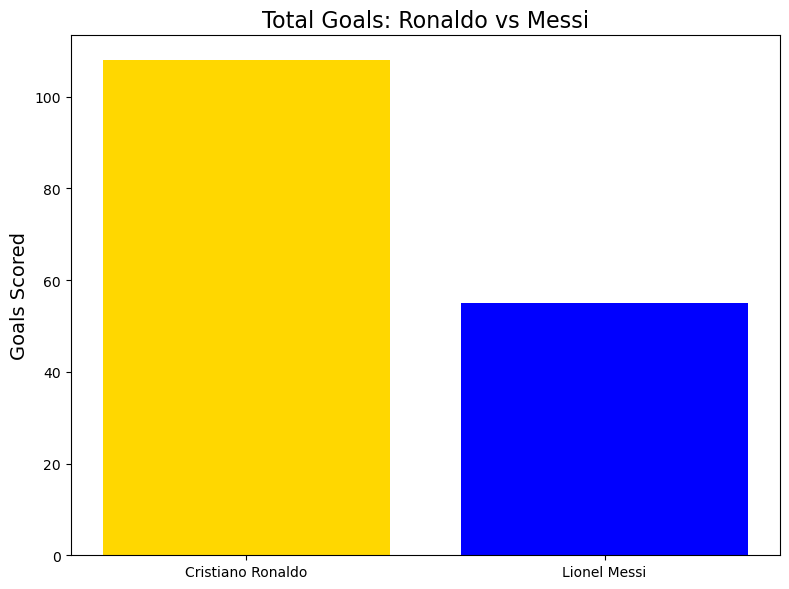

In [139]:
# Filter records for Ronaldo and Messi
ronaldo_goals = goalscorers_df[goalscorers_df['scorer'].str.contains('Cristiano Ronaldo', case=False, na=False)]
messi_goals = goalscorers_df[goalscorers_df['scorer'].str.contains('Lionel Messi', case=False, na=False)]

#Total goals comparison
ronaldo_total_goals = len(ronaldo_goals)
messi_total_goals = len(messi_goals)

# Prepare data for visualization
players_comparison = pd.DataFrame({
    'Player': ['Cristiano Ronaldo', 'Lionel Messi'],
    'Goals': [ronaldo_total_goals, messi_total_goals]
})

#Visualize comparison
plt.figure(figsize=(8, 6))
plt.bar(players_comparison['Player'], players_comparison['Goals'], color=['gold', 'blue'])
plt.title("Total Goals: Ronaldo vs Messi", fontsize=16)
plt.ylabel("Goals Scored", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_vs_messi_goals.png')
plt.show()

In [144]:
# Filter penalties and own goals
penalty_goals = ronaldo_goals_with_tournament[ronaldo_goals_with_tournament['penalty'] == True].shape[0]
own_goals = ronaldo_goals_with_tournament[ronaldo_goals_with_tournament['own_goal'] == True].shape[0]

# Display stats
print(f"Goals Scored via Penalty: {penalty_goals}")
print(f"Own Goals Scored: {own_goals}")

Goals Scored via Penalty: 19
Own Goals Scored: 0


Most Consistent Year: 2005
Variance in Goals: 0.0


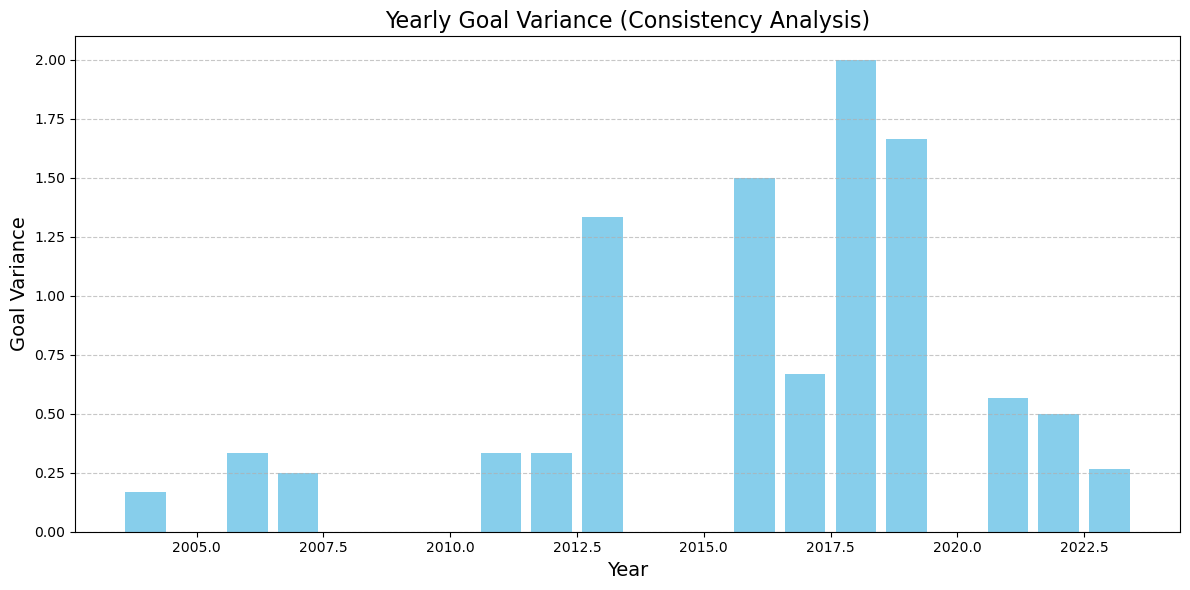

In [146]:
# Group by year and date to calculate match-wise goals for each year
match_goals_per_year = (
    ronaldo_goals_with_tournament.groupby(['year', 'date'])
    .size()
    .reset_index(name='match_goals')
)

# Calculate the variance of goals per match for each year
consistency_analysis = (
    match_goals_per_year.groupby('year')['match_goals']
    .var()
    .reset_index(name='goal_variance')
    .sort_values(by='goal_variance', ascending=True)
)

# Identify the most consistent year (lowest variance)
most_consistent_year = consistency_analysis.iloc[0]

# Display results
print(f"Most Consistent Year: {int(most_consistent_year['year'])}")
print(f"Variance in Goals: {most_consistent_year['goal_variance']}")

# Visualize variance across years
plt.figure(figsize=(12, 6))
plt.bar(consistency_analysis['year'], consistency_analysis['goal_variance'], color='skyblue')
plt.title("Yearly Goal Variance (Consistency Analysis)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Goal Variance", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_consistency_analysis.png')
plt.show()

C:\Users\shail\AppData\Local\Temp\ipykernel_2164\727433890.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ronaldo_2019_goals['goal_timing'] = ronaldo_2019_goals['minute'].apply(categorize_goal_time)


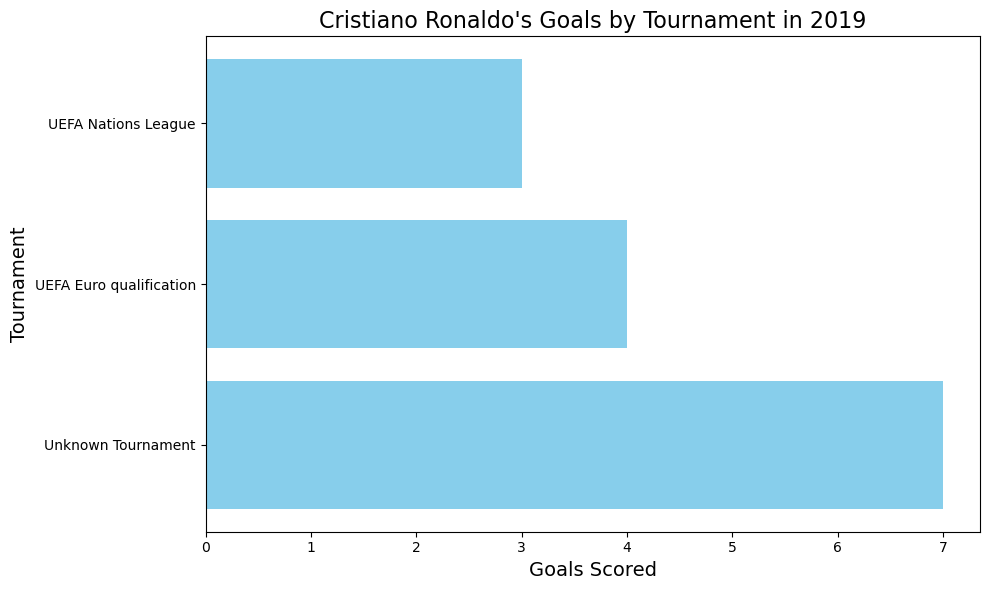

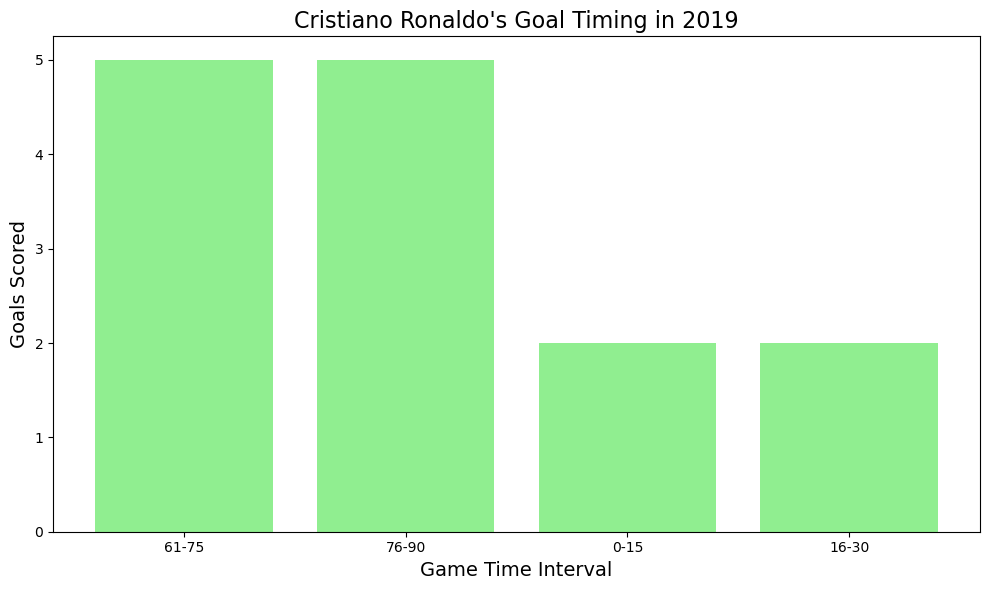

{'Goals by Match':         date  goal_count
 2 2019-09-10           4
 0 2019-06-05           3
 5 2019-11-14           3
 1 2019-09-07           1
 3 2019-10-11           1
 4 2019-10-14           1
 6 2019-11-17           1,
 'Goals by Tournament':                 tournament  goal_count
 2       Unknown Tournament           7
 0  UEFA Euro qualification           4
 1      UEFA Nations League           3,
 'Goal Timing Distribution':   goal_timing  goal_count
 2       61-75           5
 3       76-90           5
 0        0-15           2
 1       16-30           2}

In [148]:
# Filter goals from 2019
ronaldo_2019_goals = ronaldo_goals_with_tournament[ronaldo_goals_with_tournament['year'] == 2019]

#Analyze 2019 goals by match
goals_by_match_2019 = (
    ronaldo_2019_goals.groupby('date')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Analyze 2019 goals by tournament
goals_by_tournament_2019 = (
    ronaldo_2019_goals.groupby('tournament')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Analyze goal timing in 2019
ronaldo_2019_goals['goal_timing'] = ronaldo_2019_goals['minute'].apply(categorize_goal_time)
goal_timing_2019 = (
    ronaldo_2019_goals.groupby('goal_timing')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Visualize 2019 tournament performance
plt.figure(figsize=(10, 6))
plt.barh(goals_by_tournament_2019['tournament'], goals_by_tournament_2019['goal_count'], color='skyblue')
plt.title("Cristiano Ronaldo's Goals by Tournament in 2019", fontsize=16)
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Tournament", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_2019_goals_by_tournament.png')
plt.show()

#Visualize 2019 goal timing
plt.figure(figsize=(10, 6))
plt.bar(goal_timing_2019['goal_timing'], goal_timing_2019['goal_count'], color='lightgreen')
plt.title("Cristiano Ronaldo's Goal Timing in 2019", fontsize=16)
plt.xlabel("Game Time Interval", fontsize=14)
plt.ylabel("Goals Scored", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_2019_goal_timing.png')
plt.show()

# Display insights
{
    "Goals by Match": goals_by_match_2019,
    "Goals by Tournament": goals_by_tournament_2019,
    "Goal Timing Distribution": goal_timing_2019
}

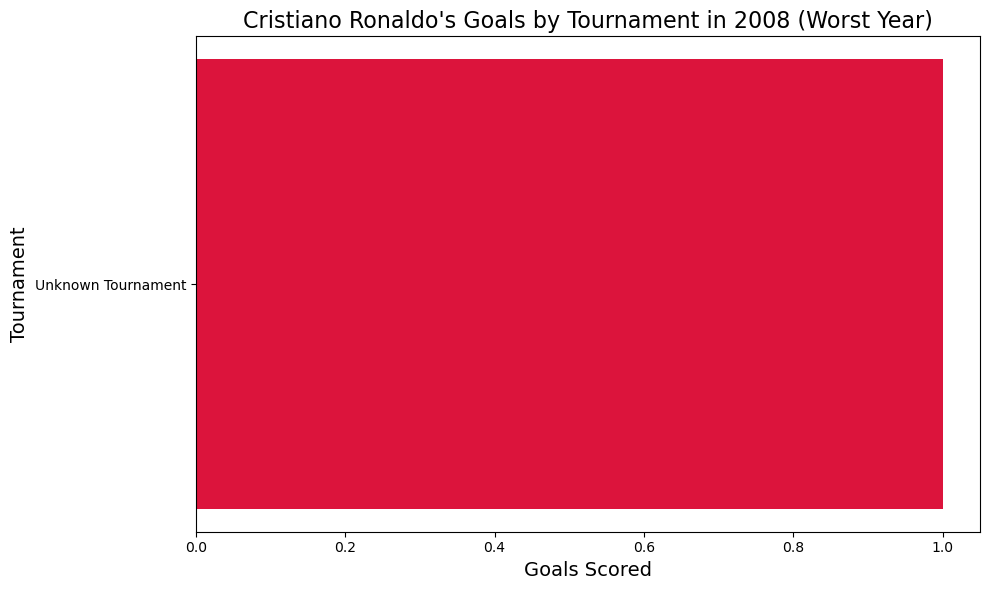

{'Worst Year': 2008,
 'Goals by Match':         date  goal_count
 0 2008-06-11           1,
 'Goals by Tournament':            tournament  goal_count
 0  Unknown Tournament           1,
 'Total Goals': 1.0}

In [150]:
# Identify Ronaldo's worst year based on total goals
worst_year = ronaldo_yearly_goals.loc[ronaldo_yearly_goals['goal_count'].idxmin()]

# Filter data for Ronaldo's worst year
ronaldo_worst_year_goals = ronaldo_goals_with_tournament[ronaldo_goals_with_tournament['year'] == worst_year['year']]

#Analyze goals by match in the worst year
goals_by_match_worst_year = (
    ronaldo_worst_year_goals.groupby('date')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Analyze goals by tournament in the worst year
goals_by_tournament_worst_year = (
    ronaldo_worst_year_goals.groupby('tournament')
    .size()
    .reset_index(name='goal_count')
    .sort_values(by='goal_count', ascending=False)
)

#Visualize goals by tournament in the worst year
plt.figure(figsize=(10, 6))
plt.barh(goals_by_tournament_worst_year['tournament'], goals_by_tournament_worst_year['goal_count'], color='crimson')
plt.title(f"Cristiano Ronaldo's Goals by Tournament in {int(worst_year['year'])} (Worst Year)", fontsize=16)
plt.xlabel("Goals Scored", fontsize=14)
plt.ylabel("Tournament", fontsize=14)
plt.tight_layout()
plt.savefig('/mnt/data/ronaldo_worst_year_goals_by_tournament.png')
plt.show()

# Display analysis insights
{
    "Worst Year": int(worst_year['year']),
    "Goals by Match": goals_by_match_worst_year,
    "Goals by Tournament": goals_by_tournament_worst_year,
    "Total Goals": worst_year['goal_count']
}